![title](img/Lending Club.jpg)

## Lending Club Loandata Exploratory Data Analysis

* LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.

### Question to answer?

* Identify key factors that increase risk asscociated with a loan transaction
* Summarize the key characteristics of Lending Club's business, product type, transaction amounts, interest rate, etc
* Recommendations based on our findings

## 1.Preprocessing

In [2]:
# Imports
# pandas, numpy, matplotlib, seaborn, pyecharts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Set styte similar to ggplot2 in R
import seaborn as sns
sns.set_style('whitegrid')
# The output of the plotting commands is displayed inline
%matplotlib inline 
from pyecharts import Pie

# Ignore warning signs
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei'] # Default font 
import math

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


## 2. Load Dataset

In [3]:
df = pd.read_csv('LoanStats_2018Q2.csv', encoding = 'latin-1', skiprows = 1)

## 3. EDA

* Once the data has been loaded, we should perform data quality checking and exploration. The main purpose of this stage is to identify any extreme values, missing values, is the value making sense? This is critical to cleaning the data in the next step, also, this is to ensure that the model we built later is refrained from garbage in and garbage out.

In [4]:
df.shape

(130774, 145)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,36 months,20.39%,373.63,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,20000.0,20000.0,20000.0,60 months,13.06%,455.68,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,14000.0,14000.0,14000.0,60 months,10.56%,301.34,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000.0,8000.0,8000.0,36 months,6.83%,246.40,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22000.0,22000.0,22000.0,60 months,17.47%,552.34,D,D1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,130772.000000,130772.000000,130772.000000,130772.000000,1.307720e+05,0.0,0.0,130446.000000,130772.000000,...,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000
mean,NaN,15908.827578,15908.827578,15905.581088,463.120534,7.866513e+04,NaN,NaN,19.287532,0.235203,...,3.0,231.230000,3.0,0.400000,693.690000,22339.162000,159.228000,4127.000000,65.002500,15.000000
std,NaN,10129.848940,10129.848940,10128.950549,286.199582,8.753510e+04,NaN,NaN,19.478335,0.746970,...,0.0,149.846609,0.0,0.894427,449.539826,14386.741805,265.932916,2331.619323,0.009574,3.464102
min,NaN,1000.000000,1000.000000,1000.000000,30.120000,0.000000e+00,NaN,NaN,0.000000,0.000000,...,3.0,55.550000,3.0,0.000000,166.650000,4452.480000,0.140000,2291.000000,64.990000,12.000000
25%,NaN,8000.000000,8000.000000,8000.000000,251.060000,4.500000e+04,NaN,NaN,11.090000,0.000000,...,3.0,90.360000,3.0,0.000000,271.080000,10019.260000,1.000000,2630.750000,64.997500,12.000000
50%,NaN,13500.000000,13500.000000,13500.000000,381.740000,6.500000e+04,NaN,NaN,17.385000,0.000000,...,3.0,289.130000,3.0,0.000000,867.390000,27504.330000,5.560000,3385.500000,65.005000,15.000000
75%,NaN,21375.000000,21375.000000,21375.000000,627.470000,9.500000e+04,NaN,NaN,24.730000,0.000000,...,3.0,326.600000,3.0,0.000000,979.800000,32032.790000,173.350000,4881.750000,65.010000,18.000000
max,NaN,40000.000000,40000.000000,40000.000000,1628.080000,9.930475e+06,NaN,NaN,999.000000,23.000000,...,3.0,394.510000,3.0,2.000000,1183.530000,37686.950000,616.090000,7446.000000,65.010000,18.000000


In [7]:
# Examine first column
df.iloc[:,1].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: member_id, dtype: float64

* There are many missing values, we might want to remove columns with lots of missing values and save the remaining data frames into CSV format

#### Missing Value Imputation

* Get number of missing values for each column

In [8]:
# lambda function df.apply(lambda x: sum(x.isnull()))
def count_null(column):
    return len(column[pd.isnull(column)])

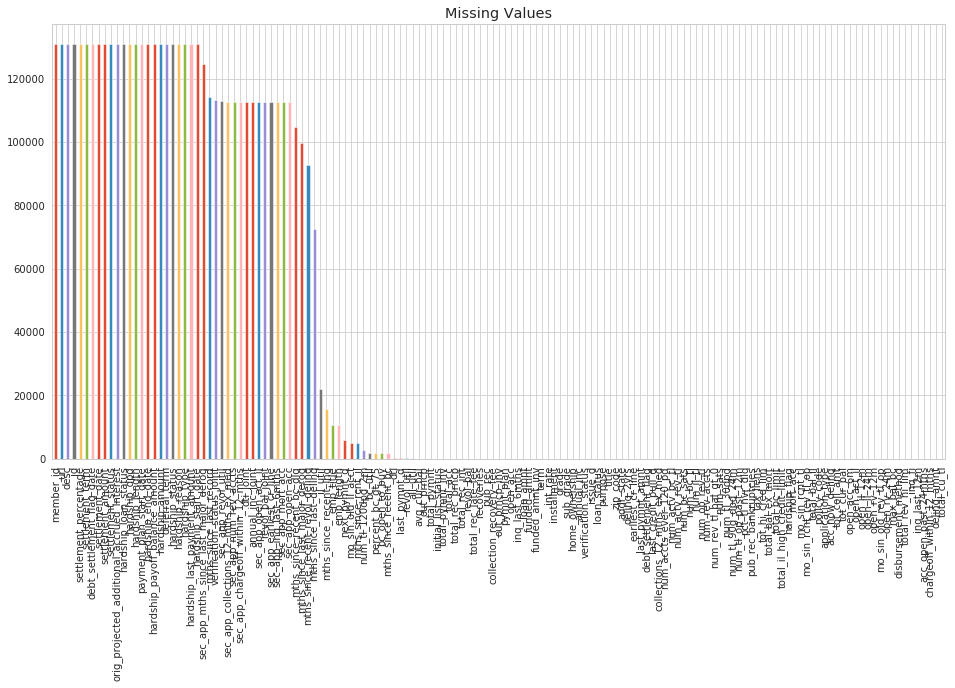

In [9]:
plt.figure(figsize = (16,8))
null_count = df.apply(count_null).sort_values(ascending = False)
null_count.plot(kind = 'bar')
plt.title('Missing Values')
plt.show()

In [10]:
half_count = len(df) / 2
df = df.dropna(thresh = half_count, axis = 1) # drop columns with more than 50% missing

# fill missing value with median, mean, mice algorithm, KNN prediction, etc...

# save to csv
df.to_csv('loan_2018Q2.csv', index = False)

#### Reload Dataset using saved CSV file

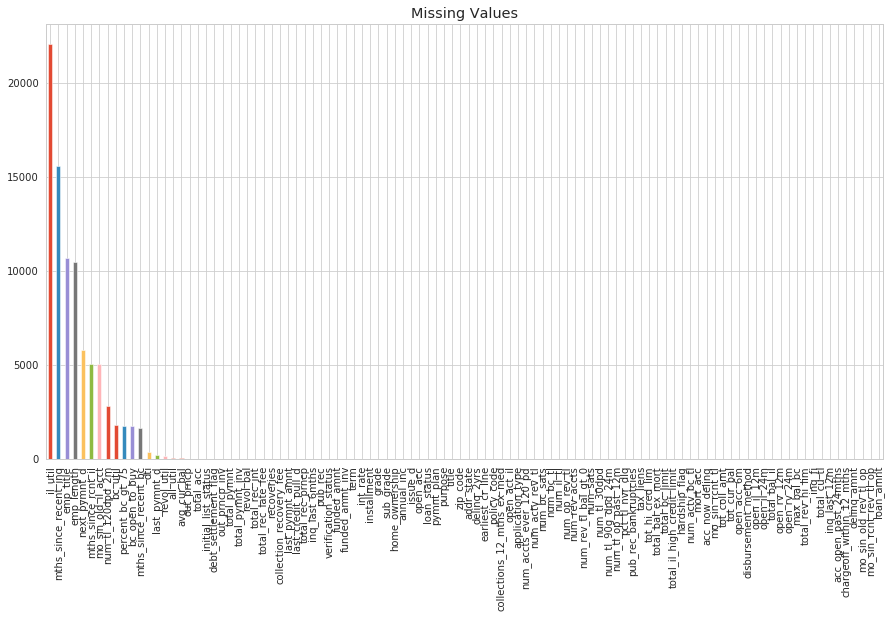

In [11]:
loans = pd.read_csv('loan_2018Q2.csv')

plt.figure(figsize = (15,8))
loans.apply(count_null).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Missing Values')
plt.show()

In [12]:
loans.shape # Column number down from 137 to 102

(130774, 102)

In [13]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,10000.0,10000.0,10000.0,36 months,20.39%,373.63,D,D4,Realtor,3 years,...,100.0,0.0,0.0,78151.0,64253.0,2200.0,42451.0,N,Cash,N
1,20000.0,20000.0,20000.0,60 months,13.06%,455.68,C,C1,Business Analyst,6 years,...,50.0,0.0,0.0,554201.0,69467.0,55700.0,25201.0,N,DirectPay,N
2,14000.0,14000.0,14000.0,60 months,10.56%,301.34,B,B3,Product Manager,8 years,...,16.7,0.0,0.0,277254.0,76757.0,63500.0,79008.0,N,Cash,N
3,8000.0,8000.0,8000.0,36 months,6.83%,246.40,A,A3,City Attorney,2 years,...,0.0,0.0,0.0,484141.0,255345.0,25100.0,282141.0,N,Cash,N
4,22000.0,22000.0,22000.0,60 months,17.47%,552.34,D,D1,Laborer,10+ years,...,33.3,1.0,0.0,142179.0,120562.0,30800.0,109379.0,N,DirectPay,N


#### Choose columns that are useful

In [14]:
used_col = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 
            'loan_status', 'purpose', 'annual_inc', 'emp_length']
# Loan amount, term, interest rate, grade, issue date, address_state, 
# loan status, purpose, annual income, employment length

used_data = loans[used_col]

In [15]:
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length
0,10000.0,36 months,20.39%,D,Jun-2018,VT,Current,debt_consolidation,26000.0,3 years
1,20000.0,60 months,13.06%,C,Jun-2018,CA,Current,debt_consolidation,94000.0,6 years
2,14000.0,60 months,10.56%,B,Jun-2018,PA,Current,credit_card,98000.0,8 years
3,8000.0,36 months,6.83%,A,Jun-2018,TX,Current,debt_consolidation,144000.0,2 years
4,22000.0,60 months,17.47%,D,Jun-2018,IN,Current,credit_card,60000.0,10+ years


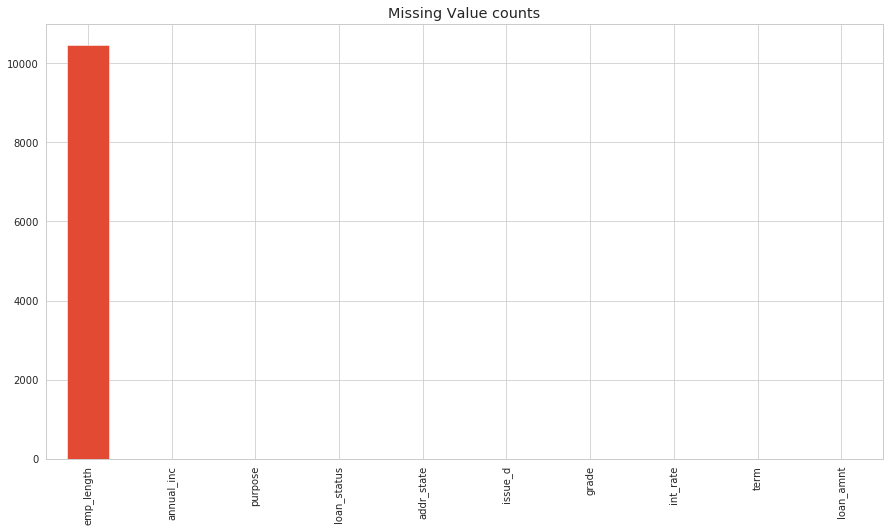

In [16]:
plt.figure(figsize = (15,8))
used_data.apply(count_null).sort_values(ascending = False).plot(kind = 'bar')
plt.title("Missing Value counts")
plt.show()

### Univariate Analysis

### 1. Loan Status Distribution

#### Missing Value

In [17]:
# find and drop missing value
used_data = used_data[used_data['loan_status'].isnull() == False]

In [18]:
pd.unique(used_data['loan_status'])

array(['Current', 'Late (16-30 days)', 'Fully Paid', 'Late (31-120 days)',
       'In Grace Period', 'Charged Off'], dtype=object)

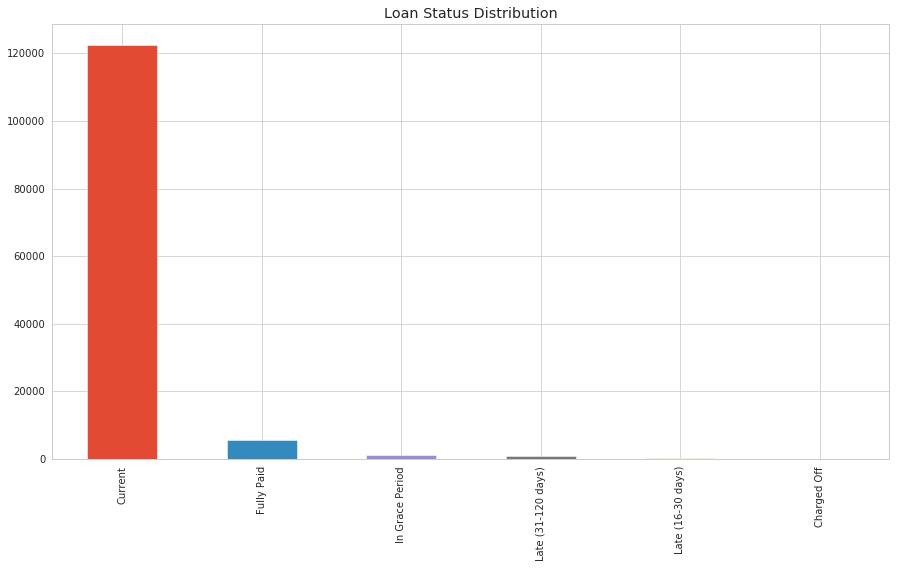

In [19]:
plt.figure(figsize = (15,8))
used_data['loan_status'].value_counts().plot(kind = 'bar', title = 'Loan Status Distribution')
plt.show()

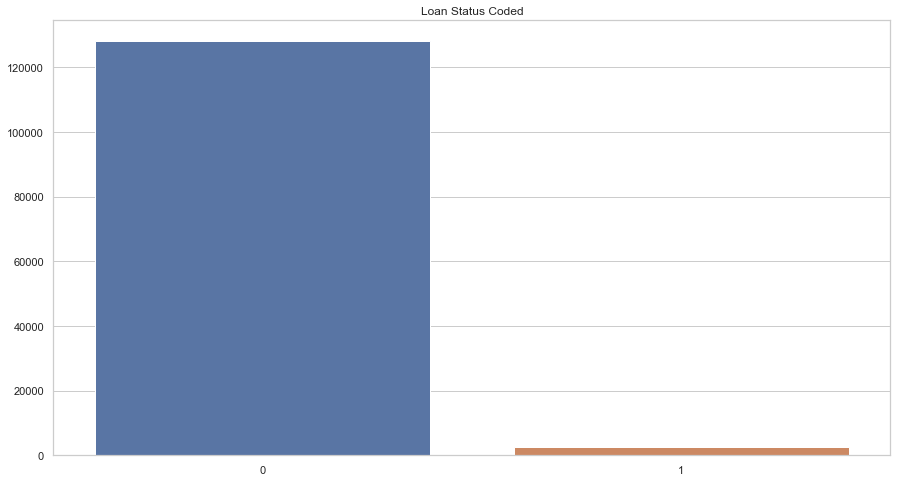

After Coding:
0    128129
1      2643
Name: loan_status_coded, dtype: int64


In [20]:
# For the purpose of training binary classification model, we convert the loan status variable to binary coding
def coding(col, codeDict):
    
    colCoded = pd.Series(col, copy = True)
    for k, v in codeDict.items():
        colCoded.replace(k, v, inplace = True)
    
    return colCoded

# 1 for default loan and 0 for non-default
codeDict = {'Current':0, 'Fully Paid':0, 
            'In Grace Period':1, 'Late (16-30 days)':1, 'Late (31-120 days)':1, 'Charged Off':1}

used_data['loan_status_coded'] = coding(used_data['loan_status'], codeDict)
# used_data['loan_status_coded'].value_counts().plot(kind = 'bar', title = 'Loan Status Coded', legend = True)
plt.figure(figsize = (15,8))
sns.set(style="whitegrid")
status_count = used_data['loan_status_coded'].value_counts()
sns.barplot(x = status_count.index, y = status_count.values)

plt.title("Loan Status Coded")
plt.legend(loc = 'best')
plt.show()

print('After Coding:\n{}'.format(status_count))

In [21]:
# Use list_comprehension
# default = ['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off']
# used_data['loan_status'].apply(lambda x: 1 if x in default else 0)
# [1 if x in default else 0 for x in used_data['loan_status']]

In [22]:
# Use Pyechart to plot
count = [i for i in status_count]
attr = ['Normal','Default']
pie = Pie('Percentage of Default')
pie.add('', attr, count, is_label_show = True)
pie

* From the visualization plot we can see that there are 128129 normal and 2643 default loands. The percentange of default is 2.02%, which suggests that the dataset is extremely unbalanced. Machine Learning models generally do not work well on unbalanced data, which is a problem we need to deal with later

### 2. Loan Amount Distribution

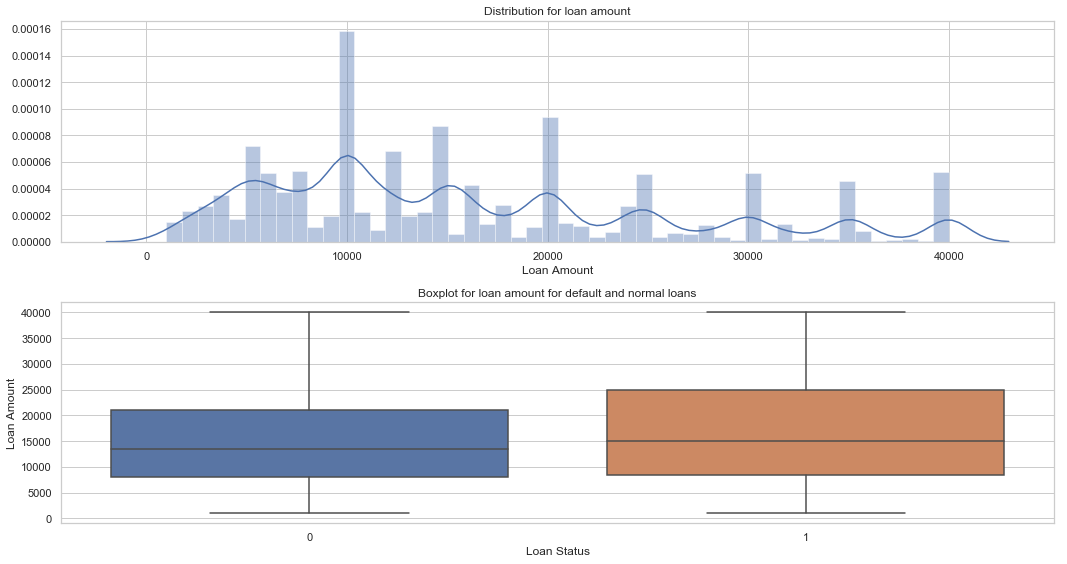

In [23]:
# use distplot to plot univariate distribution of variable and boxplot
fig, axes = plt.subplots(nrows = 2, figsize = (15,8))
ax1 = sns.distplot(used_data['loan_amnt'], ax = axes[0])
ax2 = sns.boxplot(x = 'loan_status_coded', y = 'loan_amnt', data = used_data, ax = axes[1])

ax1.set_title("Distribution for loan amount")
ax1.set_xlabel("Loan Amount")
ax2.set_title("Boxplot for loan amount for default and normal loans")
ax2.set_xlabel("Loan Status")
ax2.set_ylabel('Loan Amount')
fig.tight_layout()
plt.show()

* The distribution is skewed to the right, the largest loan amount is 40000, most loan amount is centered at 10000, which is small amount. The boxplot show slightly different in mean between default and normal loan status. The higher the loan amount, the higher the risk

### 3. Loan term

In [24]:
print(used_data['term'].value_counts())

 36 months    91506
 60 months    39266
Name: term, dtype: int64


In [25]:
count = [i for i in used_data['term'].value_counts()]
attr = ['36 Months', '60 Months']
pie = Pie('Percentage of loan terms',title_pos = '5%', width = 800)
pie.add('',attr, count, is_label_show = True, legend_orient = 'vertical', legend_pos = '70%')
pie

* About 70% of the loan is 36 months and 30% of the loans is 60 months. Normally, the loan term has an increasing relationship with default risk. The longer the term, the higher chance a borrower might default on the loan. Lending club would prefer to issue shorter-terms on loan transactions.

### 4. Purpose

In [26]:
print(used_data['purpose'].value_counts())

debt_consolidation    64141
credit_card           32822
other                 11309
home_improvement       9652
major_purchase         3763
house                  2240
medical                1958
car                    1525
small_business         1243
vacation               1115
moving                  932
renewable_energy         72
Name: purpose, dtype: int64


In [27]:
count = list(used_data['purpose'].value_counts())
attr = ['debt consolidation', 'credit card', 'other', 'home improvement', 
        'major purchase', 'house', 'medical', 'car', 'small business',
       'vacation', 'moving', 'renewable energy']
pie = Pie('Percentage of purpose of loan', title_pos = '5%',width=1000)
pie.add('',attr, count, is_label_show = True, is_legend_show = False)
pie

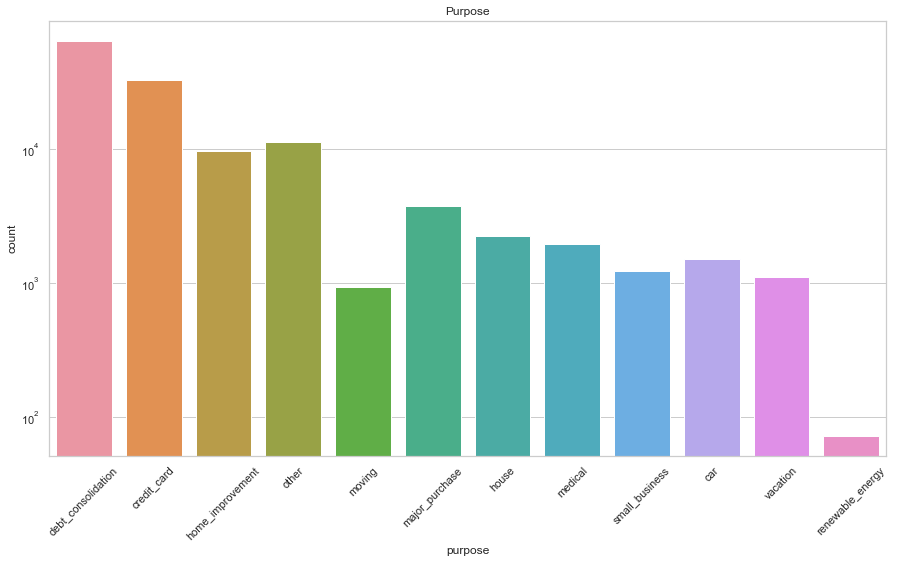

In [28]:
fig, axes = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = 'purpose', data = used_data)
ax.set(yscale = 'log') # change to log scale for better comparison
plt.xticks(rotation = 45)
plt.title("Purpose")
plt.show()

* Most people use P2P lending platform for the purpose of debt consolidation, borrow new debt to pay off old debt.
* **Debt Consolidation** is the process that allows borrowers to refinance and/or turn multiple smaller (high-interest rate) loans into one single loan
* Second to that is credit card, most people resort to this kind of loan transcation because they do not have many cash in hand. These group of people revert to P2P lending mainly because they are not approved for a loan at traditional financial institutions. This also suggests these group of people have higher risk to default

### 5. Grade

In [29]:
count = list(used_data['grade'].value_counts().sort_index())
attr = list(used_data['grade'].value_counts().sort_index().index)
pie = Pie("Percentage of Grade", title_pos = '5%', width = 1000)
pie.add('', attr, count, is_label_show = True)

* Lending club divides its customer into 7 different credit tiers, A - G, with A being the highest scoring credit tier. The lower the credit tier, the higher the risk of default. Currently, most consumers have credit tier from A - C. It appears that lending club is fairly strict on consumer's credit history.

### 6. Interest rate

In [30]:
used_data['int_rate_num'] = used_data['int_rate'].str.rstrip('%').astype('float') # convert to float type

In [31]:
print(used_data.describe())

           loan_amnt    annual_inc  loan_status_coded   int_rate_num
count  130772.000000  1.307720e+05      130772.000000  130772.000000
mean    15908.827578  7.866513e+04           0.020211      12.560977
std     10129.848940  8.753510e+04           0.140721       5.100623
min      1000.000000  0.000000e+00           0.000000       5.310000
25%      8000.000000  4.500000e+04           0.000000       8.080000
50%     13500.000000  6.500000e+04           0.000000      11.980000
75%     21375.000000  9.500000e+04           0.000000      15.490000
max     40000.000000  9.930475e+06           1.000000      30.990000


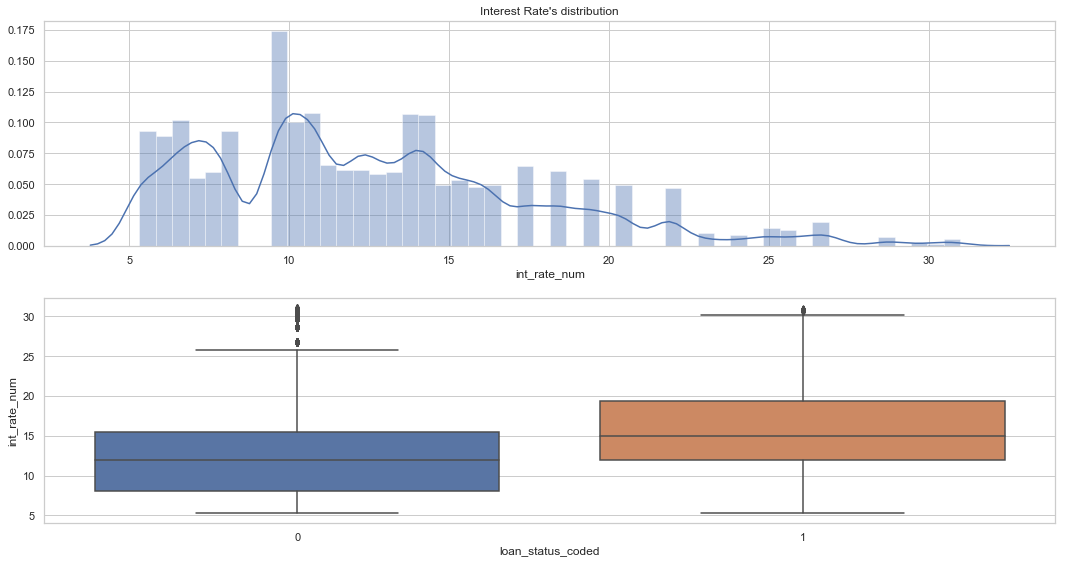

In [32]:
fig, axes = plt.subplots(nrows = 2,figsize = (15,8))
ax1 = sns.distplot(used_data['int_rate_num'], ax = axes[0])
ax2 = sns.boxplot(x = 'loan_status_coded', y = 'int_rate_num', data = used_data, ax = axes[1])
ax1.set_title('Interest Rate\'s distribution')
plt.tight_layout()
plt.show()

* The median interest rate is 11.98%, maximum is 30.99% and lowest is 5.31%. The higher the interest rate, the higher the default risk

### Multivariate Analysis

### 1. Loan amount vs time

In [33]:
used_data['issue_d2'] = pd.to_datetime(used_data['issue_d'])
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length,loan_status_coded,int_rate_num,issue_d2
0,10000.0,36 months,20.39%,D,Jun-2018,VT,Current,debt_consolidation,26000.0,3 years,0,20.39,2018-06-01
1,20000.0,60 months,13.06%,C,Jun-2018,CA,Current,debt_consolidation,94000.0,6 years,0,13.06,2018-06-01
2,14000.0,60 months,10.56%,B,Jun-2018,PA,Current,credit_card,98000.0,8 years,0,10.56,2018-06-01
3,8000.0,36 months,6.83%,A,Jun-2018,TX,Current,debt_consolidation,144000.0,2 years,0,6.83,2018-06-01
4,22000.0,60 months,17.47%,D,Jun-2018,IN,Current,credit_card,60000.0,10+ years,0,17.47,2018-06-01


In [34]:
# create month level datetime object
used_data['issue_month'] = used_data['issue_d2'].dt.to_period('M')
loan_amount_by_month = used_data.groupby('issue_month')['loan_amnt'].sum()
loan_amount_by_month = pd.DataFrame(loan_amount_by_month).reset_index()
loan_amount_by_month

,issue_month,loan_amnt
0,2018-04,685339900.0
1,2018-05,733698150.0
2,2018-06,661391150.0


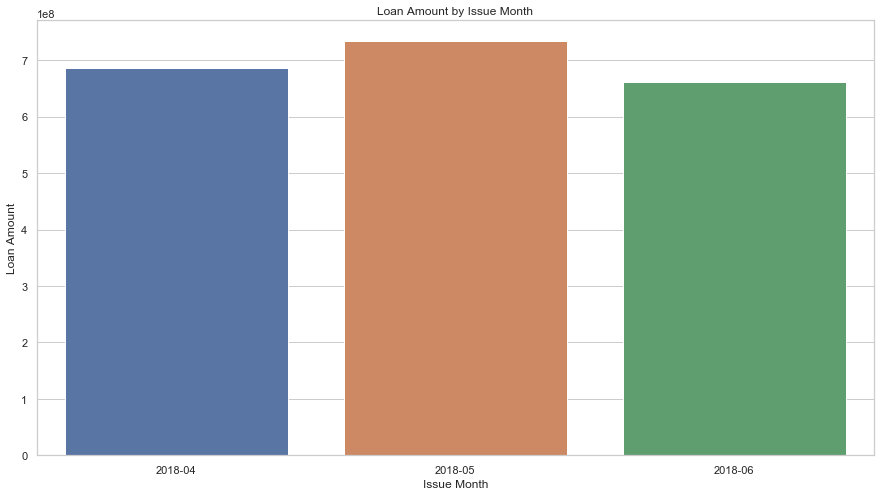

In [35]:
fig, axes = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'issue_month', y = 'loan_amnt', data = loan_amount_by_month)
ax.set_xlabel('Issue Month')
ax.set_ylabel('Loan Amount')
plt.title('Loan Amount by Issue Month')
plt.show()

* This may not be helpful since we are only looking at 2018 Q2 data for lending club. By including more data we can see the general trend for Lending Club's business growth.

### 2. Loan Amount vs State

In [36]:
loan_amount_by_state = pd.DataFrame(used_data.groupby('addr_state')['loan_amnt'].sum()).reset_index()
loan_amount_by_state.head()

,addr_state,loan_amnt
0,AK,5170350.0
1,AL,23636475.0
2,AR,15428075.0
3,AZ,49811300.0
4,CA,285702275.0


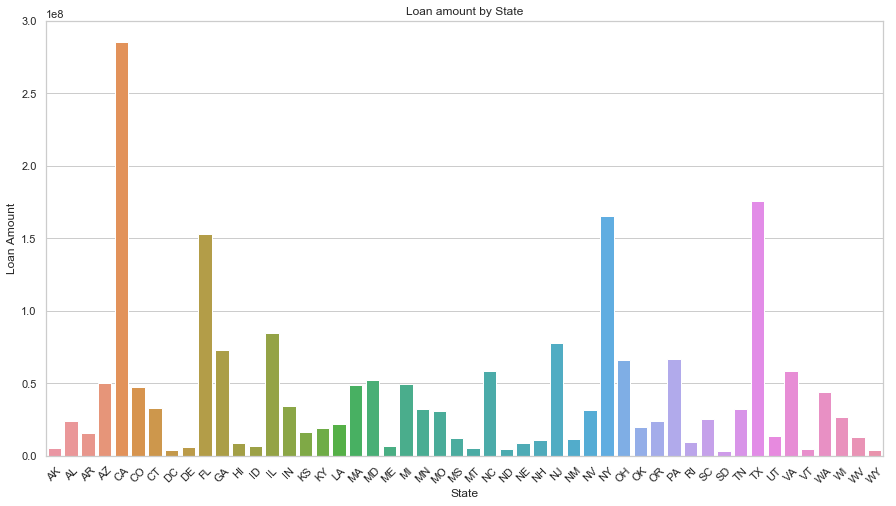

In [37]:
fig, axes = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'addr_state', y ='loan_amnt', data = loan_amount_by_state)
ax.set_xlabel('State')
ax.set_ylabel('Loan Amount')
plt.xticks(rotation = 45)
plt.title('Loan amount by State')
plt.show()

* The ranking of states in terms of total loan amount issued are `California`, `Texas`, `New York`, and `Florida` respectively. From risk management perspective, extra attention should be placed on those states.

### 3. Grade, Term, and Interest Rate

In [38]:
rate_by_term_grade = used_data.groupby(['grade','term'])['int_rate_num'].mean()
rate_by_term_grade = pd.DataFrame(rate_by_term_grade).reset_index().pivot(index = 'grade', columns = 'term', values = 'int_rate_num')
print(rate_by_term_grade)

term    36 months   60 months
grade                        
A        6.746506    7.019196
B       10.596526   10.723737
C       14.406390   14.432773
D       19.292110   19.379927
E       24.379742   25.706813
F       29.865455   29.411831
G       30.821250   30.804368


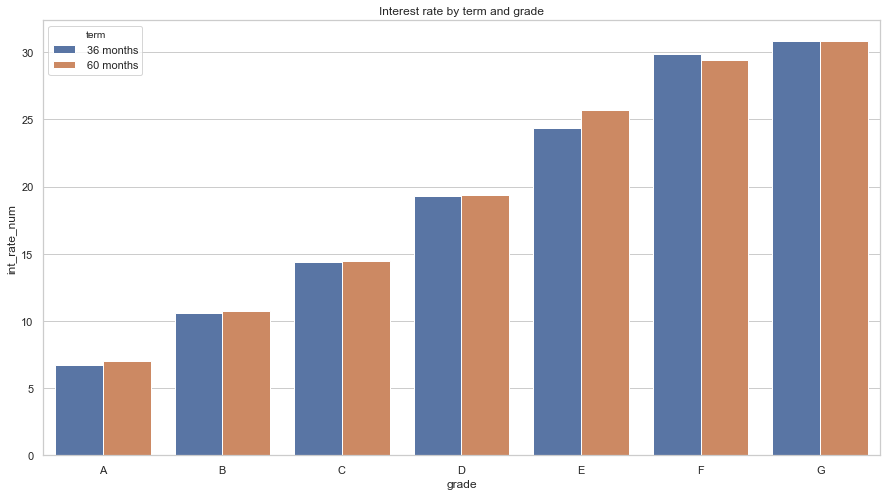

In [39]:
fig, axes = plt.subplots(figsize = (15,8))
d = used_data.groupby(['grade','term'])['int_rate_num'].mean().reset_index()
ax = sns.barplot(x = 'grade', y = 'int_rate_num', hue = 'term', data = d)
plt.title('Interest rate by term and grade')
plt.show()

* It looks like the longer term have slightly higher average interest rate. Also, interest rate is higher for borrower with subprime credit tier.

### 4. Purpose and Interest Rate

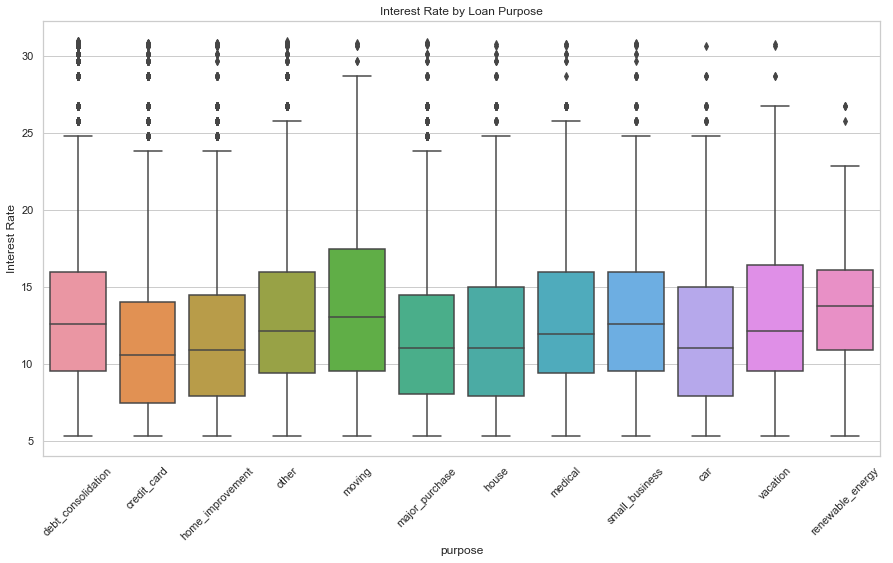

In [40]:
fig, axes = plt.subplots(figsize = (15,8))
ax = sns.boxplot(x = 'purpose', y ='int_rate_num', data = used_data)
ax.set_xlabel('purpose')
ax.set_ylabel('Interest Rate')
plt.xticks(rotation = 45)
plt.title('Interest Rate by Loan Purpose')
plt.show()

* Purpose of loan with highest average interst rate are moving, debt_consolidation, and other

### 5. Interest Rate and Loan Amount

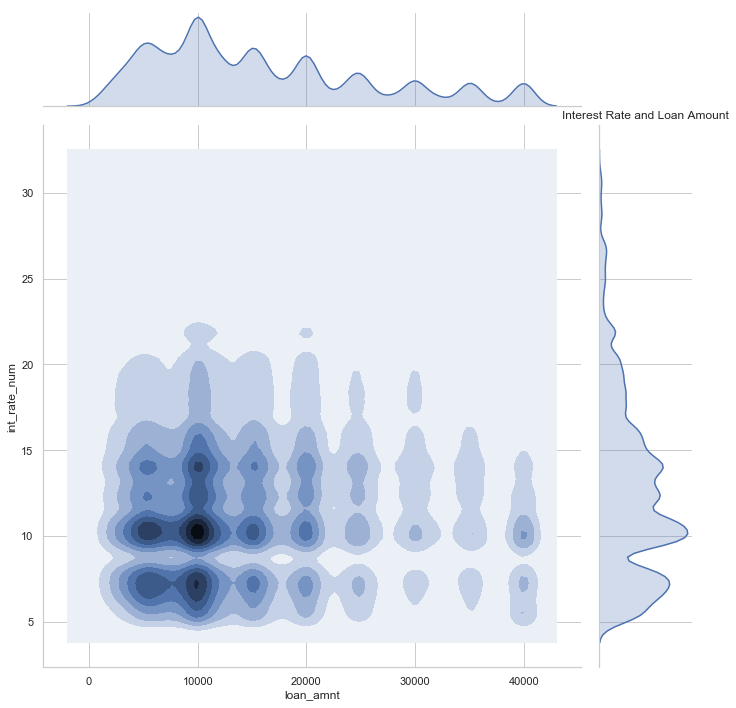

In [41]:
plt.figure(figsize = (15,8))
sns.jointplot('loan_amnt', 'int_rate_num', data = used_data, kind = 'kde', size = 10)
plt.title('Interest Rate and Loan Amount')
plt.show()

* There is not siginificant relationship between interest rate and loan amount

### 6. Interest Rate and Delinquency

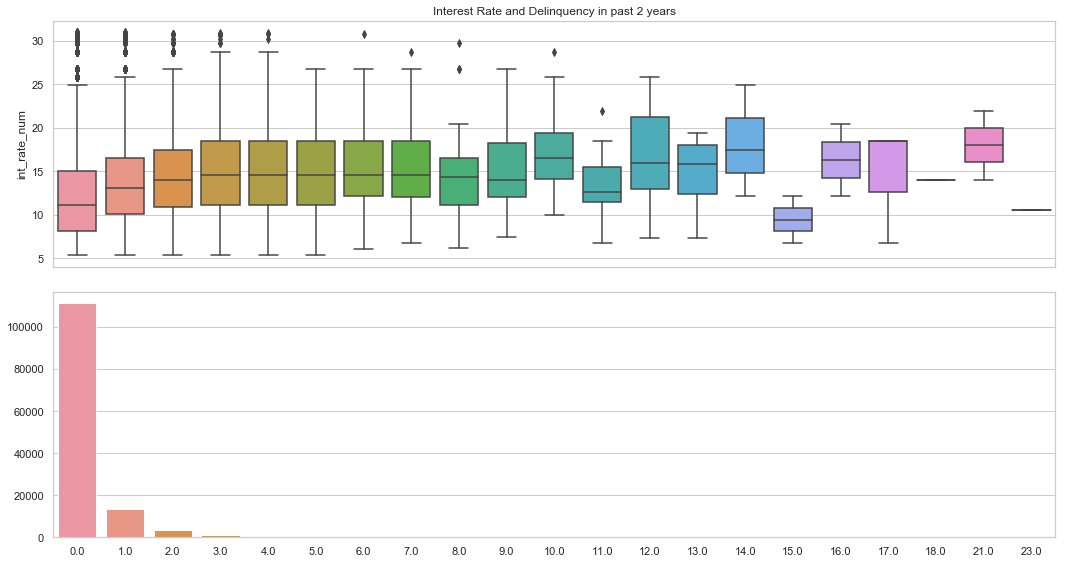

In [42]:
loans['int_rate_num'] = loans['int_rate'].str.rstrip('%').astype('float') # convert to float type
fig, axes = plt.subplots(nrows = 2, figsize = (15,8), sharex = True)
ax1 = sns.boxplot(x = 'delinq_2yrs', y = 'int_rate_num', data = loans, ax = axes[0])
count = loans['delinq_2yrs'].value_counts()
ax2 = sns.barplot(x = count.index, y = count.values, ax = axes[1])
ax1.set_title('Interest Rate and Delinquency in past 2 years')
ax1.set_xlabel('')
ax2.set_title('')
fig.tight_layout()
plt.show()

* Majority of the borrowers have 0 deliquency in the past 2 years. However, the higher the delinquency number, the higher the interest should be

### 7. Employment Length, Annual Income, Loan Status, and Interest Rate

In [43]:
used_data['emp_length'].unique()

array(['3 years', '6 years', '8 years', '2 years', '10+ years', nan,
       '1 year', '< 1 year', '4 years', '5 years', '9 years', '7 years'], dtype=object)

In [44]:
# Use mapping to change data
mapping_dict = {
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year': 0,
        'n/a':0
    }
}
used_data = used_data.replace(mapping_dict)

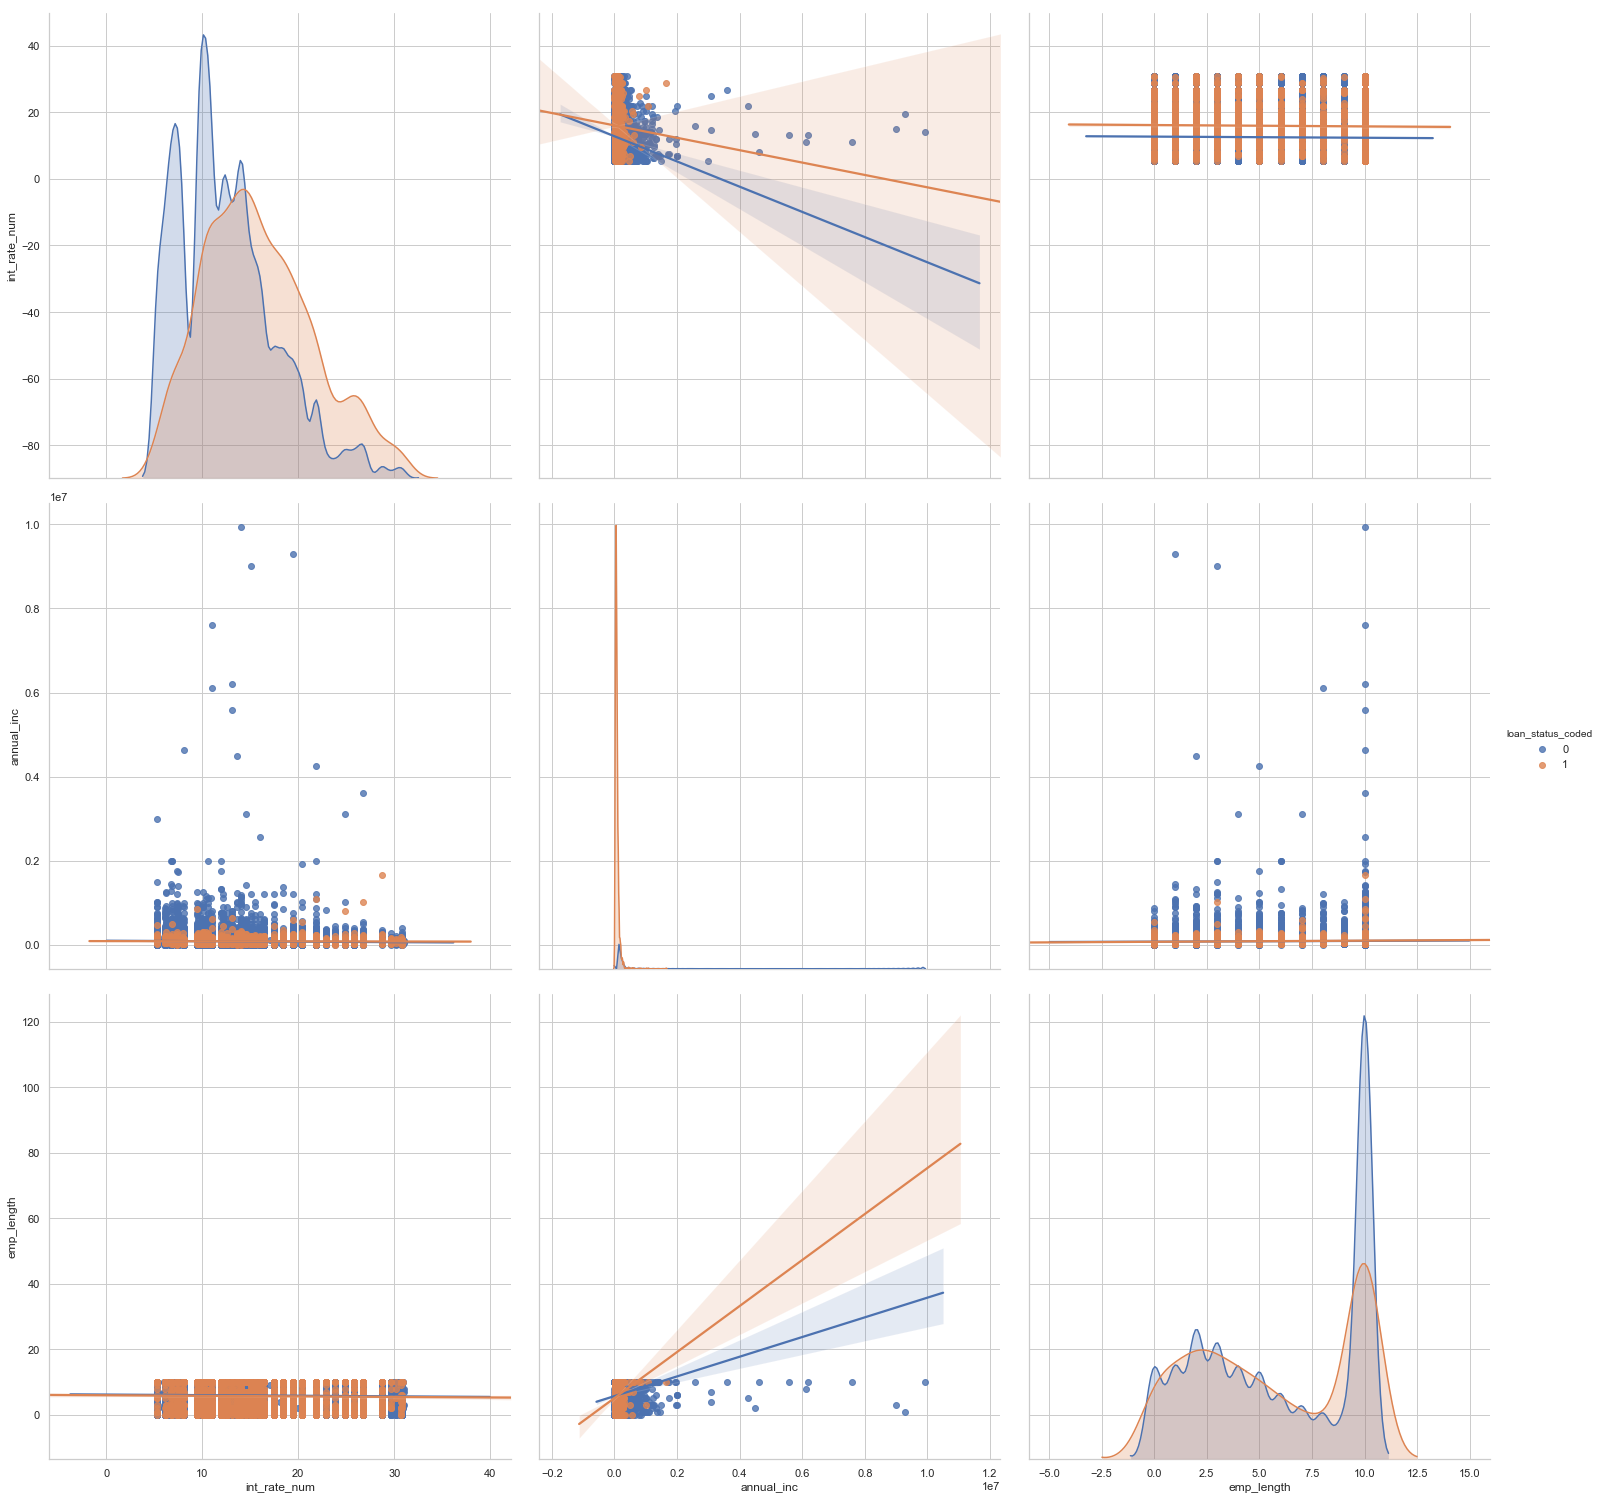

In [45]:
sns.pairplot(used_data, vars = ['int_rate_num', 'annual_inc', 'emp_length'], hue = 'loan_status_coded', diag_kind = 'kde', kind = 'reg', size = 7)
plt.show()

* Employment length has positive relationship with annual income, leading to lower risk of default. Surprisingly, we find that people who default, they have lower annual income given the the same employment length compared to those who do not default.

### Summary

In [46]:
corr = used_data.corr()
corr

,loan_amnt,annual_inc,emp_length,loan_status_coded,int_rate_num
loan_amnt,1.000000,0.229171,0.077912,0.015164,0.031336
annual_inc,0.229171,1.000000,0.074519,0.000056,-0.064467
emp_length,0.077912,0.074519,1.000000,-0.009694,-0.025705
loan_status_coded,0.015164,0.000056,-0.009694,1.000000,0.093882
int_rate_num,0.031336,-0.064467,-0.025705,0.093882,1.000000


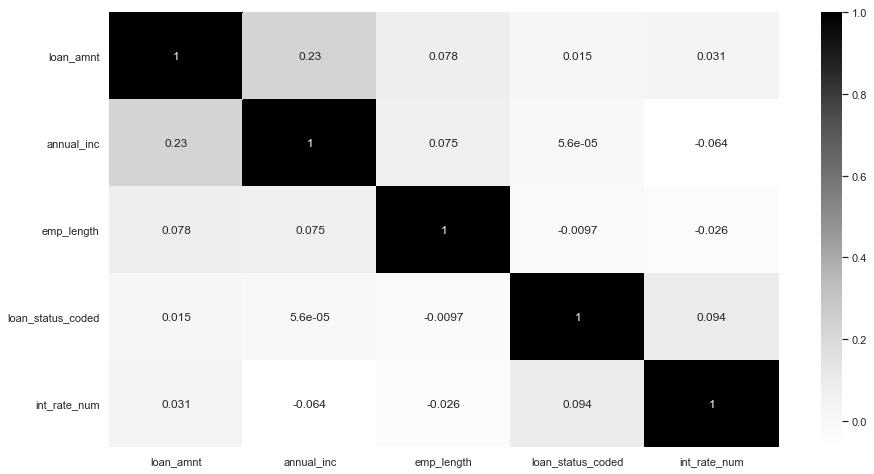

In [47]:
fig, axes = plt.subplots(figsize = (15,8))
sns.heatmap(corr,annot=True, cmap = 'Greys')
plt.show()

* The variables do not have strong correlation with each other

#### 1. Risk Factors

* Borrowers with high annual income, high credit tier, and longer employment length tend to have lower risk of defaulting, the interest rate associated with loans should be lower. People with past deliquency may have higher chance of defaulting

#### 2. Lending Club Business Overview

* The business is quite stable with minor fluctaution in loan amount issued in Q2, 2018
* Business focuses on small amount of loan, centered at amount 10,000 dollars
* Higher interest rate than traditional loan issuers like banks
* Default risk is properly controlled with only about 2% people default

#### 3. Suggestions

* Try to gather more information on borrower to better manage risk
* Use machine learning like Cascade model, Neural Network to predict default risk and to help make better informed decisions